## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# View the dataframe
mouse_metadata.head()







,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# View the dataframe

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results)
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# Display the data table for preview


In [11]:
# Checking the number of mice.
print( f'{len(mouse_metadata["Mouse ID"].unique())} mice.')


249 mice.


In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_search = mouse_study.groupby(["Mouse ID","Timepoint"]).count()
duplicate_find = duplicate_search.loc[duplicate_search["Drug Regimen"] > 1]

duplicate_mice = []
if len(duplicate_find) > 0:
    for mouse in duplicate_find.index:
        if mouse[0] not in duplicate_mice:
            duplicate_mice.append(mouse[0])
            
            
    print(f'Number of duplicate mice: {len(duplicate_mice)}')
    for mouse in duplicate_mice:
        print(f'Information for duplicate mouse {mouse} will be scrubbed from the data.')
else: print("There are no duplicate mice.")            

Number of duplicate mice: 1
Information for duplicate mouse g989 will be scrubbed from the data.


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = pd.DataFrame()

if len(duplicate_mice) > 0:
    for x in range(0,len(duplicate_mice)):
        duplicate_info = duplicate_info.append(mouse_study.loc[mouse_study["Mouse ID"] == duplicate_mice[x]])
        
        
print(duplicate_info)     

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


C:\Users\M\AppData\Local\Temp\ipykernel_20648\2786882105.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duplicate_info = duplicate_info.append(mouse_study.loc[mouse_study["Mouse ID"] == duplicate_mice[x]])


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
if len(duplicate_mice) > 0:
    for mouse in duplicate_mice:
        mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != mouse]
        
print(f" {mouse_study.shape[0]} ")        

 1880 


In [32]:
# Checking the number of mice in the clean DataFrame.
quantity = len(mouse_study["Mouse ID"].unique())
quantity

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_summary = mouse_study.groupby("Drug Regimen")
regimen_stats = pd.DataFrame({"Mean":regimen_summary["Tumor Volume (mm3)"].mean(),
                                  "Median":regimen_summary["Tumor Volume (mm3)"].median(),
                                  "Variance":regimen_summary["Tumor Volume (mm3)"].var(),
                                  "Standard Deviation":regimen_summary["Tumor Volume (mm3)"].std(),
                                  "Standard Error":regimen_summary["Tumor Volume (mm3)"].sem(),})
regimen_stats


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line???
regimen_summary = mouse_study.groupby("Drug Regimen").agg \
                ({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']})
regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

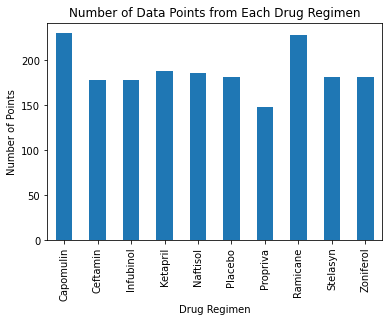

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_data_gb = mouse_study.groupby("Drug Regimen").count()
regimen_data = pd.DataFrame({"Number of Datapoints":regimen_data_gb["Timepoint"]})

regimen_data.plot(kind="bar", legend=None, title="Number of Data Points from Each Drug Regimen")\
    .set_ylabel("Number of Points")
plt.show()


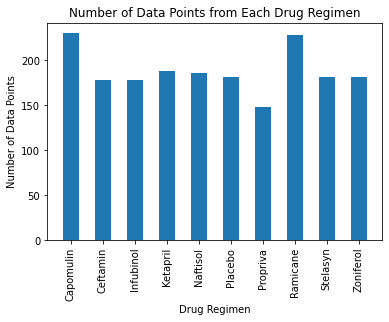

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_stats.index, regimen_data["Number of Datapoints"], align="center", width=0.5)
plt.xticks(rotation="vertical")
plt.title("Number of Data Points from Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()



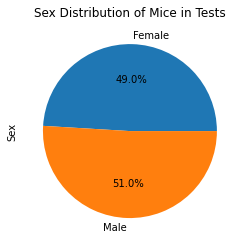

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_dist_gb = mouse_study.groupby("Sex").count()
sex_dist = pd.DataFrame({"Number of Mice":sex_dist_gb["Mouse ID"]})
sex_dist.plot(kind="pie",y="Number of Mice", legend=None, title="Sex Distribution of Mice in Tests",\
              autopct="%1.1f%%").set_ylabel("Sex")
plt.show()


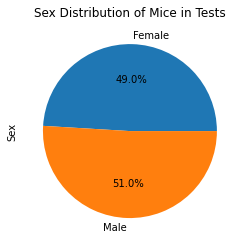

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_dist["Number of Mice"],labels=sex_dist.index.values,autopct="%1.1f%%")
plt.title("Sex Distribution of Mice in Tests")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maxtime_mice_gb = mouse_study.groupby("Mouse ID").max()
maxtime_mice = pd.DataFrame({"Drug Regimen":maxtime_mice_gb["Drug Regimen"],
                             "Timepoint":maxtime_mice_gb["Timepoint"]})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtime_data = pd.merge(maxtime_mice,
                        mouse_study[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]],
                        on=["Timepoint","Drug Regimen","Mouse ID"], how="left")



In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volumes = []
volumes_list = []
lowerq = []
upperq = []
iqr = []
min_vol = []
max_vol = []
lowers = []
uppers = []
outlier_qty = []
outlier_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for x in range(0,len(treatments)):
    volumes = maxtime_data.loc[maxtime_data["Drug Regimen"] == treatments[x],"Tumor Volume (mm3)"]
    volumes_list.append(volumes)
    min_vol.append(volumes.min())
    max_vol.append(volumes.max())
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq.append(quartiles[.25])
    upperq.append(quartiles[.75])
    
    calc_iqr = quartiles[.75]-quartiles[.25]
    iqr.append(calc_iqr)
    lower_bound = (quartiles[.25])-(calc_iqr*1.5)
    lowers.append(lower_bound)
    upper_bound = (quartiles[.75])+(calc_iqr*1.5)
    uppers.append(upper_bound)
    
    outliers = 0
    outlier_values = []
    
    
    for volume in volumes:
        if volume > upper_bound or volume < lower_bound :
            outlier_values.append(round(volume,7))
            outliers += 1
            
            
            
    if len(outlier_values) > 0:
        outlier_list.append(outlier_values)
        
    else:
        outlier_list.append("None")
        
        
            
    outlier_qty.append(outliers) 
    
            
treatments_quartiles = pd.DataFrame({"Drug Regimen":treatments,"Lower Quartile":lowerq,
                                     "Upper Quartile":upperq,"IQR":iqr,
                                     "Number of Outliers":outlier_qty,"Outliers":outlier_list})
treatments_quartiles

    
    
        
    

,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Number of Outliers,Outliers
0,Capomulin,32.377357,40.159220,7.781863,0,None
1,Ramicane,31.560470,40.659006,9.098537,0,None
2,Infubinol,54.048608,65.525743,11.477135,1,[36.3213458]
3,Ceftamin,48.722078,64.299830,15.577752,0,None


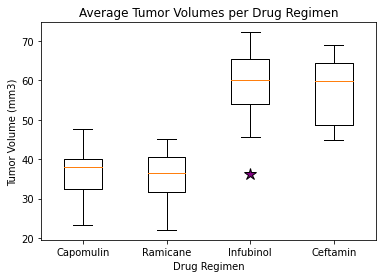

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

purplestar = dict(markerfacecolor='purple',marker='*',ms=12)


plt.boxplot(volumes_list, flierprops=purplestar)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(ticks=range(1,len(treatments)+1),labels=treatments)
plt.title("Average Tumor Volumes per Drug Regimen")
plt.show()


## Line and Scatter Plots

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
choose_drug = "Capomulin"


drug_data = mouse_study.loc[mouse_study["Drug Regimen"] == choose_drug]

drug_mice = drug_data["Mouse ID"].unique()


import random
m = (random.randint(0, len(drug_mice)-1))

drug_mouse = mouse_study.loc[mouse_study["Mouse ID"] == drug_mice[m]]



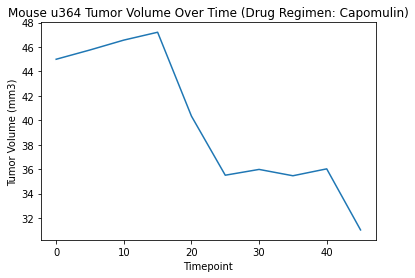

In [48]:
plt.plot(drug_mouse["Timepoint"],drug_mouse["Tumor Volume (mm3)"])
plt.title(f"Mouse {drug_mice[m]} Tumor Volume Over Time (Drug Regimen: {choose_drug})")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

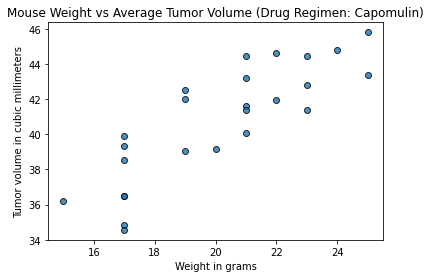

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_avg = drug_data.groupby("Mouse ID").mean()


plt.scatter(drug_avg["Weight (g)"],drug_avg["Tumor Volume (mm3)"],alpha=0.8,edgecolors="black")
plt.xlabel("Weight in grams")
plt.ylabel("Tumor volume in cubic millimeters")
plt.title(f"Mouse Weight vs Average Tumor Volume (Drug Regimen: {choose_drug})")
plt.show()


## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 


# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(drug_avg["Weight (g)"],drug_avg["Tumor Volume (mm3)"])


print(f'The correlation between weight and average tumor volume for the \
{choose_drug} regimen is {round(correlation[0],2)}.')



The correlation between weight and average tumor volume for the Capomulin regimen is 0.84.
